#Table Of Contents

* Background
* Softwares and Python Packages Needed
* ICD-9 GEM Dataset Analysis
* Algorithm
* Program

#Background

**The US transitioned from ICD-9 to ICD-10 for several key reasons:**

* ICD-9(I-9) was over 35 years old and contained outdated, obsolete terms inconsistent with current medical practice.
* The structure of I-9 limited the creation of new codes, while ICD-10 (I10)provides more room for code expansion and greater specificity in patient diagnoses.

**References:**
1. “Transitioning to ICD-10 | CMS,” Feb. 25, 2015.

The 2018_GEM, I9 and I10 text description files have been extracted from the URL - https://www.cms.gov/medicare/coding/icd10/downloads/2018-icd-10-cm-general-equivalence-mappings.zip and this could be found on the CMS website - https://www.cms.gov/medicare/coding-billing/icd-10-codes/2018-icd-10-cm-gem

# Softwares and Python Packages Needed

**Technical Requirements**

Software:
* Python 3.x
* Integrated Development Environment (IDE) or Google Colab

Required Python Libraries:

* Pandas
* Collections
* Matplotlib
* Seaborn


**Installation**

To install the necessary libraries locally, use:
* pip install pandas matplotlib seaborn

If the above does not work then, use pip3 install pandas matplotlib seaborn

**File Path Configuration**

Adjust file paths in the code according to your environment:

* Local setup: Use absolute or relative paths (e.g., '/path/to/file.csv' or './data/file.csv')
* Google Colab: Use paths relative to the notebook (e.g., '/content/file.csv')

**Example**

file_path = '/path/to/your/data/file.csv'  # Modify as needed

df = pd.read_csv(file_path)

**Ensure all file operations in the code use the correct paths for your setup.**

#ICD-9 GEM Dataset Analysis

In [ ]:
# Importing the needed libraries
import pandas as pd
from collections import defaultdict
file_icd9gem = '2018_I9gem.txt'
file_icd9desc = 'CMS32_DESC_LONG_DX.txt'
file_icd10desc = 'icd10cm_codes_2018.txt'

In [ ]:
# creating icd10desc dataframe
colspecs = [(0,7),(8,300)]
colnames =['ICD10_Code','Description']
df_ICD10desc = pd.read_fwf(file_icd10desc, colspecs = colspecs, names = colnames)
df_ICD10desc.head()

,ICD10_Code,Description
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,A009,"Cholera, unspecified"
3,A0100,"Typhoid fever, unspecified"
4,A0101,Typhoid meningitis


In [ ]:
# Creating I9DESC df
colspecs = [(0,5),(6,300)]
colnames =['ICD9_Code','Description']
df_ICD9desc = pd.read_fwf(file_icd9desc, colspecs = colspecs, names = colnames, encoding = 'latin-1')
df_ICD9desc.head()

,ICD9_Code,Description
0,0010,Cholera due to vibrio cholerae
1,0011,Cholera due to vibrio cholerae el tor
2,0019,"Cholera, unspecified"
3,0020,Typhoid fever
4,0021,Paratyphoid fever A


In [ ]:
# Creating I9GEM dataframe
colspecs = [(0,5),(6,13),(14,15),(15,16),(16,17),(17,18),(18,19)]
colnames =['ICD9_Code','ICD10_Code','Approximate','No_Mapping','Combination','Scenario','Choice_List']
df_ICD9gem = pd.read_fwf(file_icd9gem, colspecs = colspecs, names = colnames)
df_ICD9gem.head()

,ICD9_Code,ICD10_Code,Approximate,No_Mapping,Combination,Scenario,Choice_List
0,0010,A000,0,0,0,0,0
1,0011,A001,0,0,0,0,0
2,0019,A009,0,0,0,0,0
3,0020,A0100,1,0,0,0,0
4,0021,A011,0,0,0,0,0


In [ ]:
# grouping ICD9 codes and counting unique ICD10 codes
icd9_icd10_count = df_ICD9gem.groupby('ICD9_Code')['ICD10_Code'].nunique()

# finding out the ICD9 codes that map to more than one ICD10 code
icd9_mappings = icd9_icd10_count[icd9_icd10_count > 1]

# finding number of ICD9 codes that map to more than one ICD10 code
result = len(icd9_mappings)

print(f'Number of ICD9-codes that map to two or more ICD10-codes are: {result}')

Number of ICD9-codes that map to two or more ICD10-codes are: 3381


In [ ]:
# Top 10 ICD-9 codes that map to 2 or more ICD-10 codes
print('\nTop 10 ICD-9 codes that map to 2 or more ICD-10 codes\n')
print(icd9_mappings.sort_values(ascending=False).head(10))


Top 10 ICD-9 codes that map to 2 or more ICD-10 codes

ICD9_Code
V5412    533
V5416    528
V5411    213
V5413    159
99529    159
9895     152
V5417    145
V5415    132
V5419    129
29289    106
Name: ICD10_Code, dtype: int64


In [ ]:
mapping_counts = df_ICD9gem['ICD9_Code'].value_counts()
mapping_summary = mapping_counts.value_counts().reset_index(name='ICD9_Code_Count')
mapping_summary.rename(columns = {'index' : 'Number_of_ICD-10_Mappings'}, inplace = True)
mapping_summary.head()

,count,ICD9_Code_Count
0,1,11187
1,2,1777
2,3,628
3,4,518
4,5,111


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the grouping function
def group_mappings(count):
    if count <= 50:
        return '1-50'
    elif 51 <= count <= 100:
        return '51-100'
    else:
        return '101+'

# Apply the grouping function and sum the counts
grouped_summary = mapping_summary.copy()
grouped_summary['Group'] = grouped_summary['count'].apply(group_mappings)
grouped_summary = grouped_summary.groupby('Group')['ICD9_Code_Count'].sum().reset_index()

# Sort the groups in the desired order
group_order = ['1-50', '51-100', '101+']
grouped_summary['Group'] = pd.Categorical(grouped_summary['Group'], categories=group_order, ordered=True)
grouped_summary = grouped_summary.sort_values('Group')

In [ ]:
# Print the summary
print(f'Summary of the Grouped data\n{grouped_summary}\n')

Summary of the Grouped data
    Group  ICD9_Code_Count
0    1-50            14555
2  51-100                3
1    101+               10



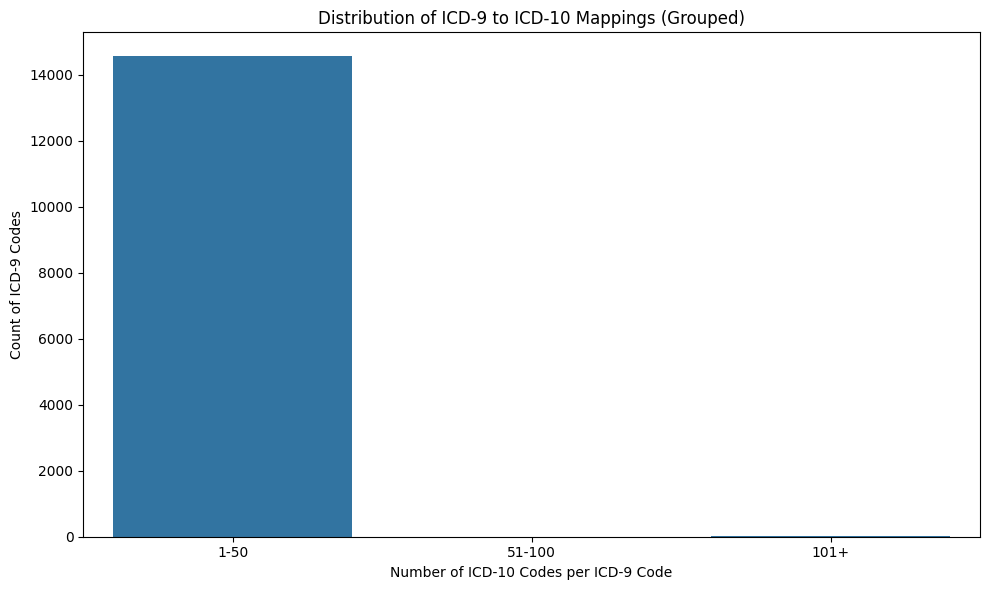

In [ ]:
# Plot the grouped distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_summary, x='Group', y='ICD9_Code_Count')
plt.title('Distribution of ICD-9 to ICD-10 Mappings (Grouped)')
plt.xlabel('Number of ICD-10 Codes per ICD-9 Code')
plt.ylabel('Count of ICD-9 Codes')
plt.tight_layout()
plt.show()

**Commplexity Analysis**
* This density plot compares the length of ICD-9 and ICD-10 codes, illustrating
the increased specificity of ICD-10 codes.

In [ ]:
df_ICD9gem['ICD9_Length'] = df_ICD9gem['ICD9_Code'].str.len()
df_ICD9gem['ICD10_Length'] = df_ICD9gem['ICD10_Code'].str.len()

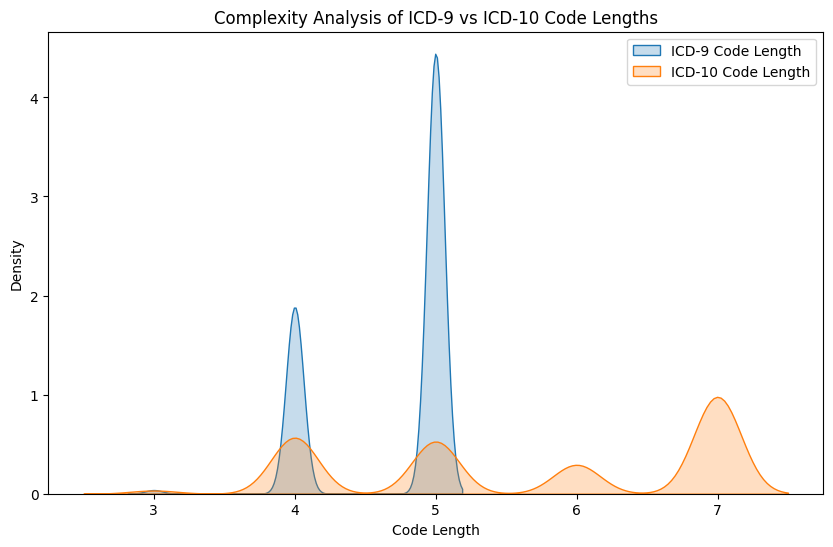

In [ ]:
# Plot the complexity analysis
plt.figure(figsize=(10, 6))
sns.kdeplot(df_ICD9gem['ICD9_Length'], label='ICD-9 Code Length', fill=True)
sns.kdeplot(df_ICD9gem['ICD10_Length'], label='ICD-10 Code Length', fill=True)
plt.title('Complexity Analysis of ICD-9 vs ICD-10 Code Lengths')
plt.xlabel('Code Length')
plt.ylabel('Density')
plt.legend()
plt.show()

**Approximate Flag Analysis**
* This bar plot shows the distribution of Approximate flags indicating the nature of the mappings.

In [ ]:
flags_summary = df_ICD9gem['Approximate'].value_counts().reset_index()
flags_summary.columns = ['Flag', 'Count']

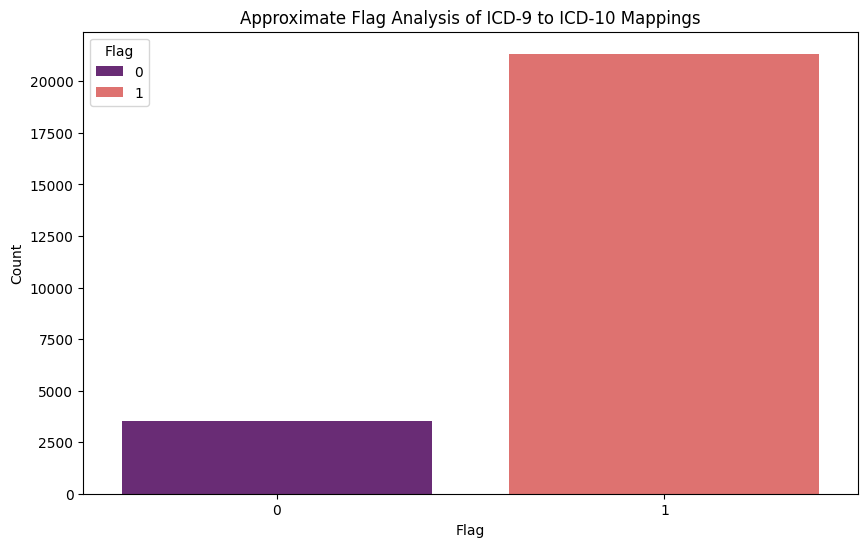

In [ ]:
# Plot the flag analysis
plt.figure(figsize=(10, 6))
sns.barplot(data = flags_summary, x = 'Flag', y = 'Count', hue = 'Flag', palette = 'magma')
plt.title('Approximate Flag Analysis of ICD-9 to ICD-10 Mappings')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

#Algorithm


**The program executes the following algorithm to change ICD-9 codes over completely to ICD-10 codes**

1. Input Validation

If the mapping database does not contain the input I-9 code or if it is null, returns "No I10 mapping." as the appropriate I10 code.

2. Single Mapping Check

In the event that the info I-9 code has precisely one I-10 planning: Provides the singular I10 code that corresponds.

3. Handling Multiple Mappings

On the off chance that various I-10 mappings exist for the info I-9 code:

a. Check the Combination Flag: On the off chance that the Combination flag is set: Return all I10 codes that correspond.

b. Word Search In Description: In the event that the Combination flag is not set:

* Look for "Other specified in I-10 descriptions: - Whenever found, return the comparing I10 code.
* Search for "unspecified" in I-10 descriptions if it is not found: - Return the appropriate I10 code if found.
* If that fails, search the I-10 descriptions for "Other": - Whenever found, return the relating I10 code.

c. Fallback: Assuming that no need words are found: Return all conceivable relating I10 codes.

**Cache Mechanism**

Create a buffer to keep mappings from I-9 to I-10 that have already been processed.
Verify that any I9 code is present in the buffer before processing it: On the off chance that present, return the reserved I-10 code(s).
If the I9 code is absent, proceed with steps 1-3 and save the output to the buffer for later use.


**This project has been created exclusively to demonstrate technical capabilities and is intended for demonstration purposes only. It is not designed for commercial application, and any use beyond this scope, particularly in real-time medical situations, should only be undertaken with the advice and supervision of a licensed healthcare professional. The developers disclaim any liability for consequences arising from the use of this project outside its intended demonstration purpose.**

#Program

In [ ]:
file_input = 'DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv'

In [ ]:
# Creating dataframe for the input patient claim data file
df_input = pd.read_csv(file_input)
df_input.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000,0,3.139084e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000,0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000,0,6.119985e+08,6.119985e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000,0,4.971603e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000,0,6.408400e+09,1.960860e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mapping Using GEMS
# List of ICD-9 diagnosis code columns to be converted to ICD-10 in the input claim files
icd9_columns = [col for col in df_input.columns if col.startswith('ICD9_DGNS_CD_')]

# Automatically creating ICD-10 columns based on ICD-9 columns
icd10_columns = [col.replace('ICD9', 'ICD10') for col in icd9_columns]

# Creating a buffer to store mappings for faster lookup
icd_buffer = defaultdict(list)

# function which has a buffer that stores the I9 and corresponding I10 codes
def buffered_find_all_mappings(input_icd9):

  # Checking if the ICD-9 code is already in the buffer
  # If yes, then returning the corresponding ICD-10 code
  if input_icd9 in icd_buffer:
    return icd_buffer[input_icd9]
  else:

    # else if the ICD-9 code is not in the buffer
    # then calculating corresponding ICD-10 code
    result = find_all_mappings(input_icd9)
    icd_buffer[input_icd9] = result
    return result

# function that maps I9 code to the corresponding I10 code/ codes
def find_all_mappings(input_icd9):
  try:
    # Checking if the ICD-9 code exists in the GEM file
    if input_icd9 not in df_ICD9gem['ICD9_Code'].values:
      print(f'No ICD-10 mapping found for {input_icd9}')
      return ['No I10 mapping']

    # Getting all rows in the GEM file matching the input ICD-9 code
    matching_rows = df_ICD9gem[df_ICD9gem['ICD9_Code'] == input_icd9]

    # checking if there is one icd10 code for icd9 code
    if len(matching_rows) == 1:
      return matching_rows['ICD10_Code'].tolist()

    # if there is more than one icd10 code for icd9 code
    # then using combination flag and description matching
    else:
      # Check for combination flag if it is 1
      # returning all the matches
      if any(matching_rows['Combination'] == 1):
        return matching_rows['ICD10_Code'].tolist()

      # else if the combination flag is 0
      # proceed with description matching
      else:
        # Get ICD-9 and ICD-10 descriptions from the description files
        icd9_description = df_ICD9desc[df_ICD9desc['ICD9_Code'] == input_icd9]['Description'].iloc[0]
        icd10_descriptions = df_ICD10desc[df_ICD10desc['ICD10_Code'].isin(matching_rows['ICD10_Code'])]

        # checking if there is an exact description match
        exact_matches = icd10_descriptions[icd10_descriptions['Description'] == icd9_description]

        # if there exact description match is not empty
        # then returning the icd10 codes
        if not exact_matches.empty:
          return exact_matches['ICD10_Code'].tolist()

        # Check for "Other specified", "unspecified", or "Other" in ICD-10 descriptions
        other_specified_matches = icd10_descriptions[icd10_descriptions['Description'].str.contains('Other specified', case=False)]
        unspecified_matches = icd10_descriptions[icd10_descriptions['Description'].str.contains('unspecified', case=False)]
        other_matches = icd10_descriptions[icd10_descriptions['Description'].str.contains('Other', case=False)]

        # returning the list of the icd10 codes where there is matching of word description of icd9 and icd10 code
        # Prioritize "Other specified" matches, then "unspecified", then "Other"
        if not other_specified_matches.empty:
          return other_specified_matches['ICD10_Code'].tolist()
        elif not unspecified_matches.empty:
          return unspecified_matches['ICD10_Code'].tolist()
        elif not other_matches.empty:
          return other_matches['ICD10_Code'].tolist()

        # No clear match - return all potential mappings
        print(f'Multiple possible mappings found for {input_icd9}. Returning all options.')
        return matching_rows['ICD10_Code'].tolist()

  except Exception as e:
    print(f'Error occurred while mapping {input_icd9}: {e}')
    return []

# Apply the mapping to each ICD-9 column in the input DataFrame
for icd9_col, icd10_col in zip(icd9_columns, icd10_columns):
  df_input[icd10_col] = df_input[icd9_col].apply(buffered_find_all_mappings)

# Save the updated DataFrame as a csv file
df_input.to_csv('Updated_Inpatient_Claims.csv', index=False)

# print(f'ICD-9 to ICD-10 mapping complete. Updated data saved to {output_path}')

No ICD-10 mapping found for 389
Multiple possible mappings found for 1985. Returning all options.
No ICD-10 mapping found for 3812
Multiple possible mappings found for 59582. Returning all options.
No ICD-10 mapping found for 2766
No ICD-10 mapping found for 3842
Multiple possible mappings found for 99859. Returning all options.
Multiple possible mappings found for 6820. Returning all options.
No ICD-10 mapping found for 5163
Multiple possible mappings found for 9694. Returning all options.
Multiple possible mappings found for 78652. Returning all options.
No ICD-10 mapping found for 3810
No ICD-10 mapping found for 845
Multiple possible mappings found for 30011. Returning all options.
Multiple possible mappings found for 96502. Returning all options.
No ICD-10 mapping found for 2841
No ICD-10 mapping found for 88
Multiple possible mappings found for 64403. Returning all options.
No ICD-10 mapping found for 388
Multiple possible mappings found for 95208. Returning all options.
No ICD-1